In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
from astropy.cosmology import z_at_value
import astropy.units as u


In [2]:
#define what SFH step we want to plot
sfh_step = 'sfh_25_50'
mass_assembly = os.environ['mass_assembly']  # Make sure this is set in your environment
filepath = os.path.join(mass_assembly, 'SFH_mpi', sfh_step, 'SFHs_alt_0.5_quenched_all_bursts.h5')

keys = [str(n) for n in np.arange(1000, 10000, 50)] + \
       [str(n) for n in np.arange(10000, 13000, 25)]
logM_all = []
logMformed = []

# Baldry+2018 double Schechter function
def double_schechter(logM, logM_star=10.76, phi1=3.72e-3, alpha1=-0.85, phi2=0.13e-3, alpha2=-1.72):
    M = 10**logM
    M_star = 10**logM_star
    term1 = phi1 * (M / M_star)**alpha1
    term2 = phi2 * (M / M_star)**alpha2
    return np.log(10) * (term1 + term2) * np.exp(-M / M_star) * M

df= pd.read_hdf(filepath, key='3000')
# Print all column names
import pandas as pd
import numpy as np

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Print the full DataFrame
# Print row(s) with index 2
print(df.loc[0])



        t         z     age     m_formed  final_age_weights         m_tot
0  3000.0  0.255935     0.0  1702.197161         974.481588  1.001702e+06
0  2999.5  0.255884     0.5  1704.085608         975.575759  1.003325e+06
0  2999.0  0.255833     1.0  1705.878629         976.615330  1.004911e+06
0  2998.5  0.255782     1.5  1707.626123         977.628866  1.006473e+06
0  2998.0  0.255731     2.0  1709.343582         978.625236  1.008017e+06
0  2997.5  0.255680     2.5  1711.038675         979.608829  1.009546e+06
0  2997.0  0.255629     3.0  1712.715984         980.582268  1.011065e+06
0  2996.5  0.255577     3.5  1714.378578         981.547311  1.012573e+06
0  2996.0  0.255526     4.0  1716.028628         982.505200  1.014074e+06
0  2995.5  0.255475     4.5  1717.667779         983.456875  1.015567e+06
0  2995.0  0.255424     5.0  1719.297299         984.403063  1.017053e+06
0  2994.5  0.255373     5.5  1720.918203         985.344346  1.018534e+06
0  2994.0  0.255322     6.0  1722.5313

# Phil's CSFH code

In [3]:
import pandas as pd
import numpy as np
from astropy.cosmology import z_at_value, FlatLambdaCDM
import matplotlib.pyplot as plt
from astropy import units as u


In [4]:
def md14(z):
    return 0.015 *(1+z)**2.7/(1+((1+z)/2.9)**5.6)

In [5]:
def double_schechter(logM,logM_star,phi_star_1,alpha_1,phi_star_2,alpha_2):
    return np.log(10)*((phi_star_1*(10**((logM - logM_star)*(1+alpha_1))))+(phi_star_2*(10**((logM - logM_star)*(1+alpha_2)))))*\
                np.exp(-10**(logM-logM_star))


In [6]:
store = pd.HDFStore('/priv/debass/DES/SIMS/mass_assembly/SFH_mpi/sfh_25_50/SFHs_alt_0.5_quenched_all_bursts.h5','r') 

In [7]:
ordered_keys = np.sort([int(x.strip('/')) for x in store.keys()])
print(ordered_keys)

[ 1000  1050  1100  1150  1200  1250  1300  1350  1400  1450  1500  1550
  1600  1650  1700  1750  1800  1850  1900  1950  2000  2050  2100  2150
  2200  2250  2300  2350  2400  2450  2500  2550  2600  2650  2700  2750
  2800  2850  2900  2950  3000  3050  3100  3150  3200  3250  3300  3350
  3400  3450  3500  3550  3600  3650  3700  3750  3800  3850  3900  3950
  4000  4050  4100  4150  4200  4250  4300  4350  4400  4450  4500  4550
  4600  4650  4700  4750  4800  4850  4900  4950  5000  5050  5100  5150
  5200  5250  5300  5350  5400  5450  5500  5550  5600  5650  5700  5750
  5800  5850  5900  5950  6000  6050  6100  6150  6200  6250  6300  6350
  6400  6450  6500  6550  6600  6650  6700  6750  6800  6850  6900  6950
  7000  7050  7100  7150  7200  7250  7300  7350  7400  7450  7500  7550
  7600  7650  7700  7750  7800  7850  7900  7950  8000  8050  8100  8150
  8200  8250  8300  8350  8400  8450  8500  8550  8600  8650  8700  8750
  8800  8850  8900  8950  9000  9050  9100  9150  9

In [ ]:
# Create a dictionary.
# The dictionary keys are the lookback time

csfh = {}

# Takes a long time to run (the timestep is very fine)

phi_star_1=3.96E-3
alpha_1=-0.35
phi_star_2=0.79E-3
alpha_2=-1.47
mstar = 10.66

step_tf=1

for counter,tf in enumerate(ordered_keys[::step_tf]):
    print("Running through key %s" % tf)
    # For each lookback time, tf, compute the mass at redshift zero for all galaxies formed at t=tf 
    M_df = store['/'+str(tf)]
    m = M_df['m_tot'].iloc[-1]
    phi = double_schechter(np.log10(m),mstar,phi_star_1,alpha_1,phi_star_2,alpha_2)

    # CLi Commemted out 
    #label=None
    #c = next(palette)

    # for each mass formed at lookback time t, scale the mass by the Schecter function
    
    for tcounter,t in enumerate(M_df['t']):
        try:
            csfh[t] += phi*M_df['m_formed'].iloc[tcounter]
        except:
            
            csfh[t] = phi*M_df['m_formed'].iloc[tcounter]


Running through key 1000
Running through key 1050
Running through key 1100
Running through key 1150
Running through key 1200
Running through key 1250
Running through key 1300
Running through key 1350
Running through key 1400
Running through key 1450
Running through key 1500
Running through key 1550
Running through key 1600
Running through key 1650
Running through key 1700
Running through key 1750
Running through key 1800
Running through key 1850
Running through key 1900
Running through key 1950
Running through key 2000
Running through key 2050
Running through key 2100
Running through key 2150
Running through key 2200
Running through key 2250
Running through key 2300
Running through key 2350
Running through key 2400
Running through key 2450
Running through key 2500
Running through key 2550
Running through key 2600
Running through key 2650
Running through key 2700
Running through key 2750
Running through key 2800
Running through key 2850
Running through key 2900
Running through key 2950


In [ ]:
print(len(csfh.keys()))

# Convert into a data frame
csfh_df = pd.DataFrame.from_dict(csfh,orient='index',columns=['SFR'])

# Examine the properties of the data frame
print(csfh_df.keys()) # One key
print(len(csfh_df)) # 25501 entries with lookback time as the index
print(csfh_df.loc[1000.0])

# Reset the index, without dropping the lookback time index and replace the original
csfh_df.reset_index(drop=False,inplace=True)

# Rename a column and replace the original dataframe
csfh_df.rename(columns={'index':'Age'},inplace=True)

# Sort by Age and replace the original dataframe
csfh_df.sort_values('Age',ascending=True,inplace=True)

print(csfh_df.Age)

25951
Index(['SFR'], dtype='object')
25951
SFR    5.274018e+07
Name: 1000.0, dtype: float64
2000         0.0
1999         0.5
1998         1.0
1997         1.5
1996         2.0
          ...   
25905    12973.0
25904    12973.5
25903    12974.0
25902    12974.5
25901    12975.0
Name: Age, Length: 25951, dtype: float64


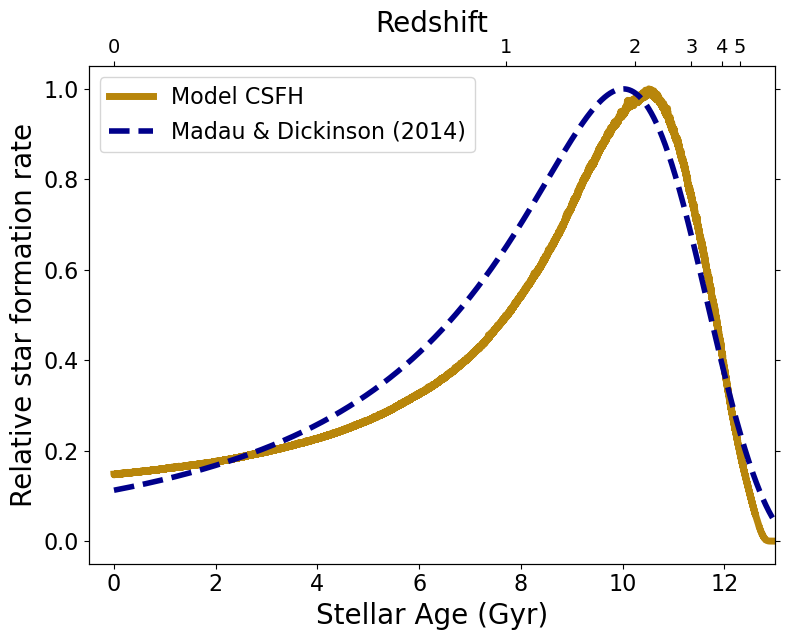

In [11]:
cosmo=FlatLambdaCDM(H0=70,Om0=0.3)


f,ax=plt.subplots(figsize=(8,6.5))

# Plot the results of the sims

ax.plot(csfh_df.Age/1000,csfh_df.SFR/csfh_df.SFR.max(),label='Model CSFH',c='darkgoldenrod',lw=5)
lt_Gyr = csfh_df.Age.apply(lambda x: x*u.Gyr/1000)
positive_ages = lt_Gyr>0 # Have not checked why the following is needed
lt_Gyr = lt_Gyr[positive_ages]
zs = lt_Gyr.apply(lambda x: z_at_value(cosmo.lookback_time, x,zmin=0))

# Plot M14
md14_csfh = md14(zs)
ax.plot(csfh_df.Age[positive_ages]/1000,md14_csfh/np.max(md14_csfh),label='Madau & Dickinson (2014)',c='darkblue',linewidth=4,linestyle='--')

ax.set_xlabel('Stellar Age (Gyr)',size=20)
ax.set_ylabel('Relative star formation rate',size=20)
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.tick_params(labelsize=16,right=True,top=False)
leg = ax.legend(loc='upper left',fontsize=16)

ax2 = ax.twiny()
zs= np.arange(0,6,1)
lt_zs = cosmo.lookback_time(zs).value
ax2.set_xticks(lt_zs)
ax2.set_xticklabels(zs)
ax.set_xlim(-0.5,13)
ax2.set_xlim(-0.5,13)
ax2.set_xlabel('Redshift',size=20)
ax2.tick_params(labelsize=14)
plt.tight_layout()


## SHARK CSFH (draft)

In [7]:
import pandas as pd

input_file = '/priv/debass/DES/SIMS/mass_assembly/SFH_mpi/shark/sfr_massformed_indexed.h5'
output_file = '/priv/debass/DES/SIMS/mass_assembly/SFH_mpi/shark/sfr_massformed_keys_multiplied.h5'

with pd.HDFStore(input_file, 'r') as store_in, pd.HDFStore(output_file, 'w') as store_out:
    keys = store_in.keys()
    print(f"Found keys: {keys}")
    
    for key in keys:
        # Convert key to float
        key_float = float(key.strip('/'))
        
        # Multiply by 10000 and convert to int
        new_key = int(key_float * 1000)
        
        # Read dataframe
        df = store_in[key]
        
        # Save in output file with new key (as string)
        store_out['/' + str(new_key)] = df
        print(f"Saved key {key} as /{new_key}")


Found keys: ['/0.1167', '/0.3492', '/0.5798', '/0.8085', '/1.0353', '/1.2602', '/1.483', '/1.7037', '/1.9224', '/10.0798', '/10.1664', '/10.2511', '/10.3339', '/10.4149', '/10.4942', '/10.5716', '/10.6474', '/10.7214', '/10.7938', '/10.8646', '/10.9338', '/11.0014', '/11.0675', '/11.132', '/11.1952', '/11.2568', '/11.3171', '/11.376', '/11.4335', '/11.4897', '/11.5446', '/11.5983', '/11.6507', '/11.7019', '/11.7519', '/11.8007', '/11.8484', '/11.895', '/11.9405', '/11.9849', '/12.0283', '/12.0707', '/12.1121', '/12.1525', '/12.192', '/12.2305', '/12.2682', '/12.3049', '/12.3408', '/12.3758', '/12.41', '/12.4434', '/12.476', '/12.5078', '/12.5389', '/12.5693', '/12.5989', '/12.6278', '/12.6561', '/12.6836', '/12.7105', '/12.7368', '/12.7625', '/12.7875', '/12.8119', '/12.8358', '/12.8591', '/12.8818', '/12.904', '/12.9257', '/12.9468', '/12.9675', '/12.9876', '/13.0073', '/13.0265', '/13.0453', '/13.0636', '/13.0814', '/13.0989', '/13.1159', '/13.1325', '/13.1487', '/13.1645', '/13.18',

/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '116'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '349'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '579'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will stil

Saved key /10.0798 as /10079
Saved key /10.1664 as /10166


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10166'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10251'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /10.2511 as /10251
Saved key /10.3339 as /10333


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10333'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10414'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /10.4149 as /10414
Saved key /10.4942 as /10494


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10494'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10571'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /10.5716 as /10571
Saved key /10.6474 as /10647


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10647'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10721'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /10.7214 as /10721
Saved key /10.7938 as /10793


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10793'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10864'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /10.8646 as /10864
Saved key /10.9338 as /10933


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10933'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11001'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.0014 as /11001
Saved key /11.0675 as /11067


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11067'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11132'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.132 as /11132
Saved key /11.1952 as /11195


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11195'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11256'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.2568 as /11256
Saved key /11.3171 as /11317


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11317'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11376'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.376 as /11376
Saved key /11.4335 as /11433


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11433'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11489'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.4897 as /11489
Saved key /11.5446 as /11544


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11544'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11598'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.5983 as /11598
Saved key /11.6507 as /11650


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11650'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11701'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.7019 as /11701
Saved key /11.7519 as /11751


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11751'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11800'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.8007 as /11800
Saved key /11.8484 as /11848


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11848'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11895'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.895 as /11895
Saved key /11.9405 as /11940


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11940'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11984'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /11.9849 as /11984
Saved key /12.0283 as /12028


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12028'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12070'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.0707 as /12070
Saved key /12.1121 as /12112


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12112'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12152'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.1525 as /12152
Saved key /12.192 as /12192


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12192'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12230'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.2305 as /12230


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12268'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.2682 as /12268
Saved key /12.3049 as /12304


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12304'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12340'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.3408 as /12340
Saved key /12.3758 as /12375


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12375'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12410'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.41 as /12410
Saved key /12.4434 as /12443


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12443'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12476'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.476 as /12476
Saved key /12.5078 as /12507


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12507'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12538'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.5389 as /12538
Saved key /12.5693 as /12569


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12569'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12598'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.5989 as /12598
Saved key /12.6278 as /12627


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12627'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12656'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.6561 as /12656
Saved key /12.6836 as /12683


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12683'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12710'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.7105 as /12710
Saved key /12.7368 as /12736


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12736'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12762'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.7625 as /12762


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12787'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12811'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /12.7875 as /12787
Saved key /12.8119 as /12811


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12835'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12859'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12881'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Saved key /12.8358 as /12835
Saved key /12.8591 as /12859
Saved key /12.8818 as /12881


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12904'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12925'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12946'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Saved key /12.904 as /12904
Saved key /12.9257 as /12925
Saved key /12.9468 as /12946


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12967'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12987'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13007'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Saved key /12.9675 as /12967
Saved key /12.9876 as /12987
Saved key /13.0073 as /13007


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13026'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13045'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13063'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Saved key /13.0265 as /13026
Saved key /13.0453 as /13045
Saved key /13.0636 as /13063
Saved key /13.0814 as /13081


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13098'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13115'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13132'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Saved key /13.0989 as /13098
Saved key /13.1159 as /13115
Saved key /13.1325 as /13132
Saved key /13.1487 as /13148
Saved key /13.1645 as /13164


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13180'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13195'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13209'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Saved key /13.18 as /13180
Saved key /13.1951 as /13195
Saved key /13.2098 as /13209
Saved key /13.2241 as /13224
Saved key /13.2382 as /13238
Saved key /13.2519 as /13251
Saved key /13.2652 as /13265


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13278'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13291'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13303'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Saved key /13.2783 as /13278
Saved key /13.291 as /13291
Saved key /13.3034 as /13303
Saved key /13.3155 as /13315
Saved key /13.3274 as /13327
Saved key /13.3389 as /13338
Saved key /13.3502 as /13350
Saved key /13.3612 as /13361
Saved key /13.372 as /13372
Saved key /13.3825 as /13382
Saved key /13.3927 as /13392
Saved key /13.4027 as /13402
Saved key /13.4124 as /13412


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13412'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13422'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13431'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Saved key /13.422 as /13422
Saved key /13.4312 as /13431
Saved key /13.4403 as /13440
Saved key /13.4492 as /13449
Saved key /13.4578 as /13457
Saved key /13.4662 as /13466
Saved key /13.4745 as /13474
Saved key /13.4903 as /13490
Saved key /13.498 as /13498
Saved key /13.5055 as /13505
Saved key /13.553 as /13553
Saved key /2.1389 as /2138
Saved key /2.3532 as /2353
Saved key /2.5653 as /2565
Saved key /2.7751 as /2775
Saved key /2.9826 as /2982
Saved key /3.1878 as /3187


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '3187'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '3390'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '3591'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will s

Saved key /3.3906 as /3390
Saved key /3.5911 as /3591
Saved key /3.789 as /3789
Saved key /3.9846 as /3984
Saved key /4.1776 as /4177
Saved key /4.3682 as /4368
Saved key /4.5562 as /4556
Saved key /4.7417 as /4741
Saved key /4.9246 as /4924
Saved key /5.1049 as /5104


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '5282'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '5457'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '5630'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will s

Saved key /5.2826 as /5282
Saved key /5.4577 as /5457
Saved key /5.6302 as /5630
Saved key /5.8 as /5800
Saved key /5.9673 as /5967
Saved key /6.1318 as /6131
Saved key /6.2938 as /6293
Saved key /6.4531 as /6453


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '6609'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '6763'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '6915'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will s

Saved key /6.6098 as /6609
Saved key /6.7638 as /6763
Saved key /6.9153 as /6915
Saved key /7.0641 as /7064
Saved key /7.2103 as /7210


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7353'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7495'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7633'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will s

Saved key /7.3539 as /7353
Saved key /7.495 as /7495
Saved key /7.6334 as /7633
Saved key /7.7694 as /7769


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7902'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8033'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8162'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will s

Saved key /7.9028 as /7902
Saved key /8.0337 as /8033
Saved key /8.1622 as /8162


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8288'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8411'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /8.2881 as /8288
Saved key /8.4117 as /8411


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8532'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8651'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /8.5328 as /8532
Saved key /8.6515 as /8651


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8767'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8882'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /8.7679 as /8767
Saved key /8.882 as /8882


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8993'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9103'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /8.9937 as /8993
Saved key /9.1032 as /9103


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9210'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9315'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /9.2104 as /9210
Saved key /9.3154 as /9315


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9418'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9519'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /9.4183 as /9418
Saved key /9.519 as /9519


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9617'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9714'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /9.6176 as /9617
Saved key /9.7141 as /9714


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9808'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9900'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /9.8085 as /9808
Saved key /9.9009 as /9900


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9991'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Saved key /9.9914 as /9991


In [8]:
try:
    store.close()
except:
    pass


In [ ]:

# Define cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Open file in read/write mode
#file_path = '/priv/debass/DES/SIMS/mass_assembly/SFH_mpi/shark/sfr_massformed_indexed.h5'


file_path = '/priv/debass/DES/SIMS/mass_assembly/SFH_mpi/shark/sfr_massformed_keys_multiplied.h5'

# Open the HDF5 file'
with pd.HDFStore(file_path, mode='r') as store:
    # Print all keys (like folder names inside the HDF5)
    keys = store.keys()
    print(f"Keys in file: {keys}")
    
    # Pick the first key to inspect its content
    first_key = '/349'
    df = store[first_key]
    
    # Print first few rows of the dataframe in that key
    print(f"\nContents of key {first_key}:")
    print(df.head(10))


Keys in file: ['/10079', '/10166', '/10251', '/10333', '/1035', '/10414', '/10494', '/10571', '/10647', '/10721', '/10793', '/10864', '/10933', '/11001', '/11067', '/11132', '/11195', '/11256', '/11317', '/11376', '/11433', '/11489', '/11544', '/11598', '/116', '/11650', '/11701', '/11751', '/11800', '/11848', '/11895', '/11940', '/11984', '/12028', '/12070', '/12112', '/12152', '/12192', '/12230', '/12268', '/12304', '/12340', '/12375', '/12410', '/12443', '/12476', '/12507', '/12538', '/12569', '/12598', '/1260', '/12627', '/12656', '/12683', '/12710', '/12736', '/12762', '/12787', '/12811', '/12835', '/12859', '/12881', '/12904', '/12925', '/12946', '/12967', '/12987', '/13007', '/13026', '/13045', '/13063', '/13081', '/13098', '/13115', '/13132', '/13148', '/13164', '/13180', '/13195', '/13209', '/13224', '/13238', '/13251', '/13265', '/13278', '/13291', '/13303', '/13315', '/13327', '/13338', '/13350', '/13361', '/13372', '/13382', '/13392', '/13402', '/13412', '/13422', '/13431',

In [6]:
import pandas as pd

file_path = '/priv/debass/DES/SIMS/mass_assembly/SFH_mpi/shark/sfr_massformed_keys_multiplied.h5'

with pd.HDFStore(file_path, mode='r+') as store:
    for key in store.keys():
        try:
            df = store.select(key)
        except Exception as e:
            print(f"Skipping non-table key {key}: {e}")
            continue

        # Make sure both columns exist
        if ('t' in df.columns) and ('galaxy_id' in df.columns or 'galaxy_id' in df.index.names):
            df = df.copy()

            # Handle the case where galaxy_id is both index and column
            if 'galaxy_id' in df.index.names:
                if 'galaxy_id' in df.columns:
                    df = df.reset_index(drop=True)  # don't add duplicate
                else:
                    df = df.reset_index()  # move index into column

            # Compute age for each galaxy
            df['age'] = df.groupby('galaxy_id')['t'].transform(lambda x: x.max() - x)
            df['age'] = df['age'].round(4)

            print(f"Added 'age' column in {key}")
            store.put(key, df, format='table', data_columns=True)
        else:
            print(f"Skipping {key}: missing required columns")


Added 'age' column in /10079


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10079'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10166


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10166'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10251


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10251'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10333


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10333'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /1035


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '1035'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10414


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10414'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10494


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10494'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10571


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10571'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10647


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10647'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10721


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10721'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10793


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10793'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10864


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10864'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /10933


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '10933'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11001


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11001'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11067


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11067'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11132


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11132'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11195


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11195'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11256


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11256'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11317


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11317'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11376


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11376'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11433


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11433'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11489


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11489'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11544


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11544'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11598


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11598'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /116


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '116'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11650


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11650'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11701


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11701'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11751


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11751'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11800


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11800'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11848


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11848'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11895


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11895'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11940


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11940'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /11984


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '11984'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12028


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12028'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12070


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12070'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12112


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12112'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12152


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12152'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12192


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12192'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12230


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12230'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12268


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12268'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12304


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12304'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12340


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12340'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12375


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12375'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12410


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12410'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12443


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12443'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12476


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12476'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12507


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12507'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12538


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12538'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12569


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12569'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12598


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12598'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /1260


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '1260'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12627


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12627'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12656


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12656'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12683


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12683'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12710


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12710'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12736


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12736'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12762


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12762'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12787


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12787'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12811


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12811'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12835


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12835'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12859


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12859'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12881


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12881'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12904


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12904'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12925


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12925'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12946


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12946'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12967


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12967'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /12987


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '12987'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13007


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13007'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13026


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13026'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13045


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13045'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13063


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13063'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13081


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13081'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13098


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13098'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13115


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13115'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13132


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13132'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13148


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13148'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13164


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13164'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13180


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13180'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13195
Added 'age' column in /13209


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13195'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13209'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13224
Added 'age' column in /13238


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13224'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13238'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13251
Added 'age' column in /13265


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13251'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13265'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13278
Added 'age' column in /13291


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13278'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13291'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13303
Added 'age' column in /13315


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13303'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13315'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /13327
Added 'age' column in /13338
Added 'age' column in /13350


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13327'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13338'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13350'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Added 'age' column in /13361
Added 'age' column in /13372
Added 'age' column in /13382


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13361'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13372'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13382'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Added 'age' column in /13392
Added 'age' column in /13402
Added 'age' column in /13412


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13392'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13402'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13412'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Added 'age' column in /13422
Added 'age' column in /13431
Added 'age' column in /13440


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13422'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13431'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13440'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Added 'age' column in /13449
Added 'age' column in /13457
Added 'age' column in /13466
Added 'age' column in /13474


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13449'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13457'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13466'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Added 'age' column in /13490
Added 'age' column in /13498
Added 'age' column in /13505


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13490'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13498'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13505'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` wil

Added 'age' column in /13553
Added 'age' column in /1483


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '13553'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '1483'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /1703
Added 'age' column in /1922


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '1703'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '1922'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /2138
Added 'age' column in /2353


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '2138'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '2353'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /2565
Added 'age' column in /2775


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '2565'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '2775'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /2982
Added 'age' column in /3187


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '2982'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '3187'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /3390
Added 'age' column in /349


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '3390'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '349'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /3591
Added 'age' column in /3789


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '3591'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '3789'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /3984


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '3984'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /4177


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '4177'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /4368


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '4368'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /4556


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '4556'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /4741


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '4741'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /4924


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '4924'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /5104


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '5104'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /5282


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '5282'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /5457


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '5457'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /5630


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '5630'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /579


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '579'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /5800


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '5800'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /5967


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '5967'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /6131


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '6131'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /6293


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '6293'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /6453


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '6453'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /6609


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '6609'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /6763


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '6763'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /6915


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '6915'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /7064


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7064'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /7210


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7210'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /7353


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7353'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /7495


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7495'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /7633


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7633'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /7769


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7769'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /7902


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '7902'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /8033


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8033'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /808


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '808'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /8162


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8162'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /8288


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8288'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /8411


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8411'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /8532


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8532'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /8651


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8651'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /8767


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8767'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /8882


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8882'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /8993


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '8993'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9103


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9103'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9210


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9210'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9315


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9315'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9418


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9418'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9519


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9519'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9617


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9617'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9714


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9714'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9808


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9808'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9900


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9900'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


Added 'age' column in /9991


/priv/debass/software/dessn/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '9991'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


In [ ]:
import pandas as pd
from astropy.cosmology import FlatLambdaCDM, z_at_value
import astropy.units as u

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
file_path = '/priv/debass/DES/SIMS/mass_assembly/SFH_mpi/shark/sfr_massformed_keys_multiplied.h5'

with pd.HDFStore(file_path, mode='r+') as store:
    for key in store.keys():
        try:
            df = store.select(key)
        except Exception as e:
            print(f"Skipping non-table key {key}: {e}")
            continue

        if 't' in df.columns:
            df = df.copy()

            # Reset index if needed
            if 'galaxy_id' in df.index.names and 'galaxy_id' not in df.columns:
                df = df.reset_index()

            # Compute z safely as float
            df['z'] = df['t'].apply(lambda tb: float(z_at_value(cosmo.lookback_time, tb * u.Gyr)))

            print(f"Added 'z' column in {key}")
            store.put(key, df, format='table', data_columns=True)
        else:
            print(f"Skipping {key}: missing 't' column")


Skipping non-table key /10079: cannot properly create the storer for: [_TABLE_MAP] [group->/10079 (Group) '',value-><class 'NoneType'>,format->None
